# Probability & Statistics

Machine learning is all about describing things that will happen, or *might happen*. For instance, we might want to assess the likelihood of a user buying a book that the recommender system suggested. For this we need to use the language of probability and statistics. We give a very brief self-contained primer below. It is *not* meant as a substitute for a good statistics course ...

To understand why we care about probabilities, consider the problem of distinguishing cats and dogs. Simple, isn't it? Not quite. In the first case, assume that the animal approaches us from afar and we want to understand which animal it is. 

| 20px | 40px | 80px | 160px | 320px |
|:----:|:----:|:----:|:-----:|:-----:|
|![](img/whitecat20.jpg)|![](img/whitecat40.jpg)|![](img/whitecat80.jpg)|![](img/whitecat160.jpg)|![](img/whitecat320.jpg)|
|![](img/whitedog20.jpg)|![](img/whitedog40.jpg)|![](img/whitedog80.jpg)|![](img/whitedog160.jpg)|![](img/whitedog320.jpg)|

While this is trivial at 320 pixel resolution, it becomes challenging at 40 pixels and next to impossible at 20 pixels. In other words, our ability of telling both apart at a large distance (and thus low resolution) might be pretty close to chance level. A statistician might express this as $\Pr(\mathrm{cat}) = 0.6$. In the same way, our AI cat detector might not be quite so sure either. 

Now consider a second case: a pet owner has a cat and a dog and he hears one of the animals approaching, about to peek through the door. All things being equal, it might be either one of the two with 0.5 probability. There's a key difference between both cases. In the first one, the outcome is quite sure but we just aren't quite sure which one it is. In the second case, the outcome is a random event. This sounds more confusing than it is. It's simply a function of our assessment, given the context (replacing cats and dogs with the sides of a coin that's being tossed might make things easier to imagine). To make progress in formalizing this, let's use some math. 

## Basic Probability Theory

Assume that we cast a dice and we would like to know our chances 
whether we wold see $1$ rather than another digit. If the dice is fair
all six outcomes $\mathcal{X} = \{1, \ldots, 6\}$ are equally likely to
occur, hence we would see a $1$ in $1$ out of $6$ cases. Formally
we state that $1$ occurs with probability $\frac{1}{6}$. 

For a real dice that we receive from a factory we might not know those
proportions and we would need to check whether it is tainted. The only
way to investigate the dice is by casting it many times and recording
the outcomes. As we do so we will observe a certain number of values
$\{1, 2, \ldots, 6\}$ occurring. A natural choice would be to use the
individual counts divided by the total number of tosses as an
*estimate* of the probability of a given event. The law of large
numbers tell us that indeed this is what will happen in the limit. 
Before going into the details of what's going here, let's try it out.

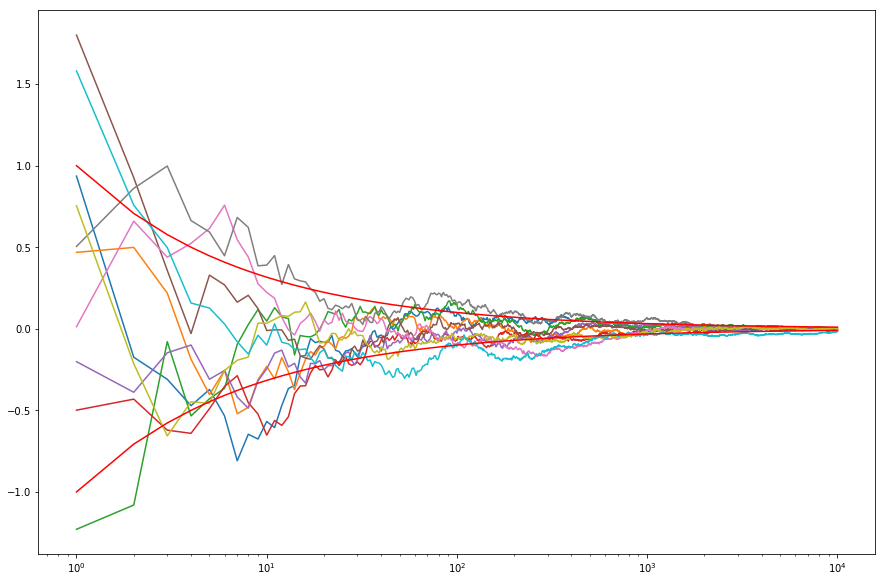

In [1]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt

# generate 10 random sequences of 10,000 random normal variables N(0,1)
x = random.normal(size=(10000,10))
# cumulative sum and normalization
y = np.arange(1,10001).reshape(10000,1)
z = np.cumsum(x,axis=0) / y

plt.figure(figsize=(15,10))
for i in range(10):
    plt.semilogx(y,z[:,i])

plt.semilogx(y,np.power(y,-0.5),'r')
plt.semilogx(y,-np.power(y,-0.5),'r')
plt.show()   

What we can see is that the red curve pretty well captures the behavior of the 10 random traces of averages. This is the case since we are averaging numbers and their aggregate behavior is like that of a number with a lot less uncertainty. Looking at the red curves, they are given by $f(x) = 1/\sqrt{x}$. (The reader might cry foul by noting that we just added Gaussian random variables which, quite obviously, lead to yet another Gaussian random variable. That said, the curves for sums of other random variables, such as $\{0, 1\}$ valued objects look identical in the limit.)

What we just introduced is the notion of a **random variable**. A random variable, say $X$ can be pretty much anything that doesn't (necessarily) assume a deterministic value. For instance $X \in \{\mathrm{cat}, \mathrm{dog}, \mathrm{rabbit}\}$ if we want to look at different animals that we might encounter, or maybe $X \in \{1, 2, ... 6\}$ when we are dealing with a dice. Or $X$ could denote the height of a car passing us, etc.

Note that there is a subtle difference between discrete random variables, like the sides of a dice, and continuous ones, like the weight and the height of a person. There's little point in asking whether two people have exactly the same height - the probably won't. In fact, even the same person will probably not have the same height at two different occasions. They might have gained weight, a tiny bit of skin on their feet might have rubbed off, etc; What makes more sense in this case is to ask whether the height falls into a given interval, say between 180.0 and 180.1 centimeters. In such cases we will typically refer to densities as a way of quantifying how likely it is that we will see a value. 

More formally (but still quite sloppy by most mathematician's standards), we posit the following for probabilities:

* For any event $Z$, the probability is never negative, i.e. $\Pr(Z) \geq 0$.
* For any two events $Z$ and $Z'$ the union is no more likely than the sum of the individual events, i.e. $\Pr(Z \cup Z') \leq \Pr(Z) + \Pr(Z')$.
* For the empty set $\emptyset$ we have $\Pr(\emptyset) = 0$ and moreover for the universe $\Omega$ we have $\Pr(\Omega) = 1$.
* For any disjoint set of events $Z \cap Z' = \emptyset$ we have $\Pr(Z \cup Z') = \Pr(Z) + \Pr(Z')$.

To deal with densities, we can use integrals, i.e.
$\Pr(Z) = \int_{z \in Z} p(z) dz$. In particular, for one-dimensional problems, we use $\Pr([a,b]) = \int_a^b p(z) dz$.

## More than one random variable

In most interesting cases we will need to deal with more than one random variable at a time. For instance, images contain millions of pixels, thus millions of random variables. And in many cases images will come with metadata, such as location, time, aperture, focal length, ISO, focus distance, camera type, etc.; All of these are random variable that occur jointly. To deal with multiple random variables, we simply write out $\Pr(A, B)$. It is clear that $\Pr(A,B) \leq \Pr(A)$ and $\Pr(A,B) \leq \Pr(B)$. This has to be the case, since for $A$ and $B$ to happen, $A$ has to happen *and then* $B$ also has to happen (and vice versa). Thus it cannot be more likely than $A$ or $B$ respectively. This brings us to an interesting ratio: $0 \leq \frac{\Pr(A,B)}{\Pr(A)} \leq 1$. We will call this a **conditional probability** and denote it by $\Pr(B|A)$, the probability that $B$ happens, provided that $A$ has happened. 

This allows us to derive one of the most useful and celebrated equations in statistics - Bayes' theorem. It goes as follows. By construction we have that $\Pr(A, B) = \Pr(B|A) \Pr(A)$. By symmetry this also holds for $\Pr(A,B) = \Pr(A|B) \Pr(B)$. Solving this for one of the conditional variables we get:

$$\Pr(A|B) = \frac{\Pr(B|A) \Pr(A)}{\Pr(B)}$$

This is very useful if we want to infer one thing from another, say cause and effect but we only know the properties in the reverse direction. One important operation that we need to make this work is **marginalization**, i.e. the operation of determining $\Pr(A)$ and $\Pr(B)$ from $\Pr(A,B)$. We can see that the probability of seeing $A$ amounts to accounting for all possible choices of $B$ and aggregating the joint probabilities over all of them, i.e. 

$$\Pr(A) = \sum_{B'} \Pr(A,B') \text{ and } \Pr(B) = \sum_{A'} \Pr(A',B)$$

A really useful property to check is for **dependence** and **independence**. Independence is when the occurrence of one event does not influence the occurrence of the other. In this case $\Pr(B|A) = \Pr(B)$. Statisticians typically use $A \perp\!\!\!\perp B$ to express this. From Bayes Theorem it follows immediately that also $\Pr(A|B) = \Pr(A)$. In all other cases we call $A$ and $B$ dependent. For instance, two successive rolls of a dice are independent. On the other hand, the position of a light switch and the brightness in the room are not (they are not perfectly deterministic, though, since we could always have a broken lightbulb, power failure, or a broken switch). 

Let's put our skills to the test. Assume that a doctor administers an AIDS test to a patient. This test is fairly accurate and fails only with 1% probability if the patient is healthy by reporting him as diseased, and that it never fails to detect HIV if the patient actually has it. We use $D$ to indicate the diagnosis and $H$ to denote the HIV status. Written as a table the outcome $\Pr(D|H)$ looks as follows:

|             | Patient is HIV positive | Patient is HIV negative |
|:------------|------------------------:|------------------------:|
|Test positive| 1 | 0.01 |
|Test negative| 0 | 0.99 |

Note that the column sums are all one (but the row sums aren't), since the conditional probability needs to sum up to $1$, just like the probability. Let us work out the probability of the patient having AIDS if the test comes back positive. Obviously this is going to depend on how common the disease is, since it affects the number of false alarms.
Assume that the population is quite healthy, e.g. $\Pr(\text{HIV positive}) = 0.0015$. To apply Bayes Theorem we need to determine 

$$\Pr(\text{Test positive}) = \Pr(D=1|A=0) \Pr(A=0) + \Pr(D=1|A=1) \Pr(A=1) = 0.01 \cdot 0.9985 + 1 \cdot 0.0015 = 0.011485$$

Hence we get $\Pr(A = 1|D = 1) = \frac{\Pr(D=1|A=1) \Pr(A=1)}{\Pr(D=1)} = \frac{1 \cdot 0.0015}{0.011485} = 0.131$, in other words, there's only a 13.1% chance that the patient actually has AIDS, despite using a test that is 99% accurate! As we can see, statistics can be quite counterintuitive. 

## Conditional Independence

What is our poor patient to do when he receives such terrifying news? Quite surely he will ask the physician to administer another test to get clarity. The second test has somewhat different characteristics (it isn't as good as the first one). 

|             | Patient is HIV positive | Patient is HIV negative |
|:------------|------------------------:|------------------------:|
|Test positive| 0.98 | 0.03 |
|Test negative| 0.02 | 0.97 |

Unfortunately the second test comes back positive, too. Let us work out the requisite probabilities to invoke Bayes' Theorem. 

* $\Pr(D_1 = 1 \text{ and } D_2 = 1|A = 0) = 0.01 \cdot 0.03 = 0.0001$
* $\Pr(D_1 = 1 \text{ and } D_2 = 1|A = 1) = 1 \cdot 0.98 = 0.98$
* $\Pr(D_1 = 1 \text{ and } D_2 = 1) = 0.0001 \cdot 0.9985 + 0.98 \cdot 0.0015 = 0.00156985$
* $\Pr(A = 1|D_1 = 1 \text{ and } D_2 = 1) = \frac{0.98 \cdot 0.0015}{0.00156985} = 0.936$

That is, the second test allowed us to gain much higher confidence that not all is well. Despite the second test being considerably less accurate than the first one, it still improved our estimate quite a bit. *Why couldn't we just run the first test a second time?* After all, the first test was more accurate. The reason is that we needed a second test that confirmed *independently* of the first test that things were dire, indeed. In other words, we made the tacit assumption that $\Pr(D_1, D_2|A) = \Pr(D_1|A) \Pr(D_2|A)$. Statisticians call such random variables **conditionally independent**. This is expressed as $D_1 \perp\!\!\!\perp D_2 | A$. 

## Naive Bayes Classification

Conditional independence is really useful when dealing with data, since it simplifies a lot of equations. A popular algorithm is the Naive Bayes Classifier. The key assumption in it is that the attributes are all independent of each other, given the labels. In other words, we have:

$$p(x|y) = \prod_i p(x_i|y)$$

Using Bayes Theorem this leads to the classifier $p(y|x) = \frac{\prod_i p(x_i|y) p(y)}{p(x)}$. Unfortunately, this is still intractable, since we don't know $p(x)$. Fortunately, we don't need it, since we know that $\sum_y p(y|x) = 1$, hence we can always recover the normalization from $p(y|x) \propto \prod_i p(x_i|y) p(y)$. After all that math, it's time for some code to show how to use a Naive Bayes classifier for distinguishing digits on the MNIST classification dataset. 

The problem is that we don't actually know $p(y)$ and $p(x_i|y)$. So we need to *estimate* it given some training data first. This is what is called *training* the model. In the case of 10 possible classes we simply compute $n_y$, i.e. the number of occurrences of class $y$ and then divide it by the total number of occurrences. E.g. if we have a total of 60,000 pictures of digits and digit 4 occurs 5800 times, we estimate its probability as $\frac{5800}{60000}$. Likewise, to get an idea of $p(x_i|y)$ we count how many times pixel $i$ is set for digit $y$ and then divide it by the number of occurrences of digit $y$. This is the probability that that very pixel will be switched on.

In [2]:
import mxnet as mx
import mxnet.ndarray as nd

mnist = mx.test_utils.get_mnist()
batch_size = 1 
# we go over one observation at a time (speed doesn't matter here)
train_data = mx.io.NDArrayIter(mnist["train_data"], mnist["train_label"], batch_size, shuffle=True)
test_data = mx.io.NDArrayIter(mnist["test_data"], mnist["test_label"], batch_size, shuffle=True)

# Initialize the count statistics for p(y) and p(x_i|y)
# We initialize all numbers with a count of 1 to ensure that we don't get a division by zero. 
# Statisticans call this Laplace smoothing
ycount = nd.ones(shape=(10))
xcount = nd.ones(shape=(784,10))

# aggregate count statistics of how frequently a pixel is on (or off) for zeros and ones
for batch in train_data:
    x = batch.data[0].reshape((784,))
    y = int((batch.label[0]).asscalar())
    ycount[y] += 1
    xcount[:,y] += x

# normalize the probabilities p(x_i|y) (divide per pixel counts by total count)
for i in range(10):
    xcount[:,i] = xcount[:,i]/ycount[i]
    
# likewise, compute the probability p(y)
py = ycount / nd.sum(ycount)

Now that we computed per-pixel counts of occurrence for all pixels, it's time to see how our model behaves. Time to plot it. We show the estimated probabilities of observing a switched-on pixel. These are some mean looking digits.

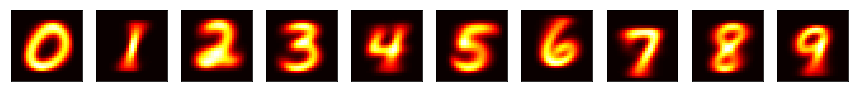


[ 0.09871688  0.11236461  0.09930012  0.10218297  0.09736711  0.09035161
  0.09863356  0.10441593  0.09751708  0.09915014]
<NDArray 10 @cpu(0)>


In [3]:
import matplotlib.pyplot as plt
fig, figarr = plt.subplots(1,10,figsize=(15,15))
for i in range(10):
    figarr[i].imshow(xcount[:,i].reshape((28,28)).asnumpy(), cmap='hot')
    figarr[i].axes.get_xaxis().set_visible(False)
    figarr[i].axes.get_yaxis().set_visible(False)

plt.show()
print(py)

Now we can compute the likelihoods of an image, given the model. This is statistican speak for $p(x|y)$, i.e. how likely it is to see a particular image under certain conditions (such as the label). Since this is computationally awkward (we might have to multiply many small numbers if many pixels have a small probability of occurring), we are better off computing its logarithm instead. That is, instead of $p(x|y) = \prod_{i} p(x_i|y)$ we compute $\log p(x|y) = \sum_i \log p(x_i|y)$. 

$$l_y := \sum_i \log p(x_i|y) = \sum_i x_i \log p(x_i = 1|y) + (1-x_i) \log \left(1-p(x_i=1|y)\right)$$

To avoid recomputing logarithms all the time, we precompute them for all pixels. 

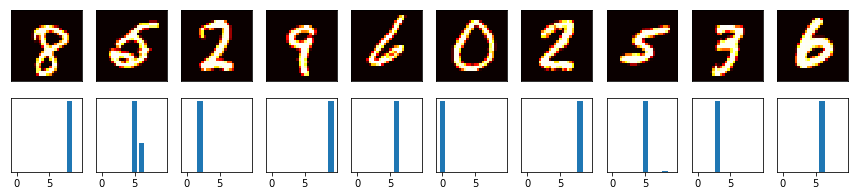

In [4]:
logxcount = nd.log(xcount)
logxcountneg = nd.log(1-xcount)
logpy = nd.log(py)

fig, figarr = plt.subplots(2,10,figsize=(15,3))

# show 10 images
for ctr in range(10):
    batch = test_data.next()
    x = batch.data[0].reshape((784,))
    y = int((batch.label[0]).asscalar())
    #
    # we need to incorporate the prior probability p(y) since p(y|x) is proportional to p(x|y) p(y)
    logpx = logpy.copy()
    for i in range(10):
        # compute the log probability for a digit
        logpx[i] = nd.dot(logxcount[:,i],x) + nd.dot(logxcountneg[:,i], 1-x)
    # normalize to prevent overflow or underflow by subtracting the largest value
    logpx -= nd.max(logpx)
    # and compute the softmax using logpx
    px = nd.exp(logpx).asnumpy()
    px /= np.sum(px)
    
    # bar chart and image of digit
    figarr[1,ctr].bar(range(10), px)
    figarr[1,ctr].axes.get_yaxis().set_visible(False)
    figarr[0,ctr].imshow(x.reshape((28,28)).asnumpy(), cmap='hot')
    figarr[0,ctr].axes.get_xaxis().set_visible(False)
    figarr[0,ctr].axes.get_yaxis().set_visible(False)

plt.show()

As we can see, this classifier is both incompetent and overly confident of its incorrect estimates. That is, even if it is horribly wrong, it generates probabilities close to 1 or 0. Not a classifier we should use very much nowadays any longer. While Naive Bayes classifiers used to be popular in the 80s and 90s, e.g. for spam filtering, their heydays are over. The poor performance is due to the incorrect statistical assumptions that we made in our model: we assumed that each and every pixel are *independently* generated, depending only on the label. This is clearly not how humans write digits, and this wrong assumption led to the downfall of our overly naive (Bayes) classifier.

## Sampling

Random numbers are just one form of random variables, and since computers are particularly good with numbers, pretty much everything else in code ultimately gets converted to numbers anyway. One of the basic tools needed to generate random numbers is to sample from a distribution. Let's start with what happens when we use a random number generator. 

In [5]:
import random
for i in range(10):
    print(random.random())

0.7977248168081996
0.8936537405024872
0.1817716118452507
0.03334746519573062
0.2493570079083397
0.6940014517742527
0.5371364570778064
0.04873960634270824
0.23003220520942336
0.3377434711762549


### Uniform Distribution

These are some pretty random numbers. As we can see, their range is between 0 and 1, and they are evenly distributed. That is, there is (actually, should be, since this is not a *real* random number generator) no interval in which numbers are more likely than in any other. In other words, the chances of any of these numbers to fall into the interval, say $[0.2,0.3)$ are as high as in the interval $[.593264, .693264)$. The way they are generated internally is to produce a random integer first, and then divide it by its maximum range. If we want to have integers directly, try the following instead. It generates random numbers between 0 and 100.

In [6]:
for i in range(10):
    print(random.randint(1,100))

76
87
83
83
15
37
95
59
9
10


What if we wanted to check that ``randint`` is actually really uniform. Intuitively the best strategy would be to run it, say 1 million times, count how many times it generates each one of the values and to ensure that the result is uniform. 

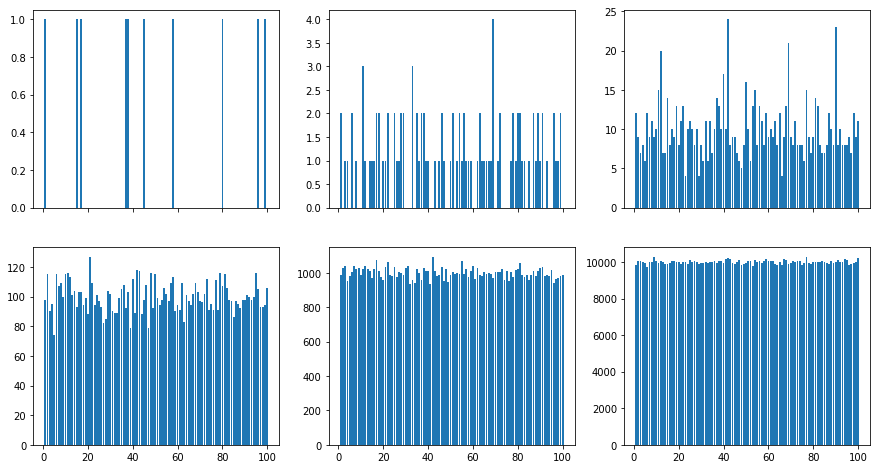

In [7]:
import math

counts = np.zeros(100)
fig, axes = plt.subplots(2, 3, figsize=(15,8), sharex=True)
axes = axes.reshape(6)
# mangle subplots such that we can index them in a linear fashion rather than a 2d grid

for i in range(1,1000001):
    counts[random.randint(0,99)] += 1
    if i in [10,100,1000,10000,100000,1000000]:
        axes[int(math.log10(i))-1].bar(np.arange(1,101), counts)
plt.show()

What we can see from the above figures is that the initial number of counts looks *very* uneven. If we sample fewer than 100 draws from a distribution over 100 outcomes this is pretty much expected. But even for 1000 samples there is a significant variability between the draws. What we are really aiming for is a situation where the probability of drawing a number $x$ is given by $p(x)$. 

### The categorical distribution

Quite obviously, drawing from a uniform distribution over a set of 100 outcomes is quite simple. But what if we have nonuniform probabilities? Let's start with a simple case, a biased coin which comes up heads with probability 0.35 and tails with probability 0.65. A simple way to sample from that is to generate a uniform random variable over $[0,1]$ and if the number is less than $0.35$, we output heads and otherwise we generate tails. Let's try this out.

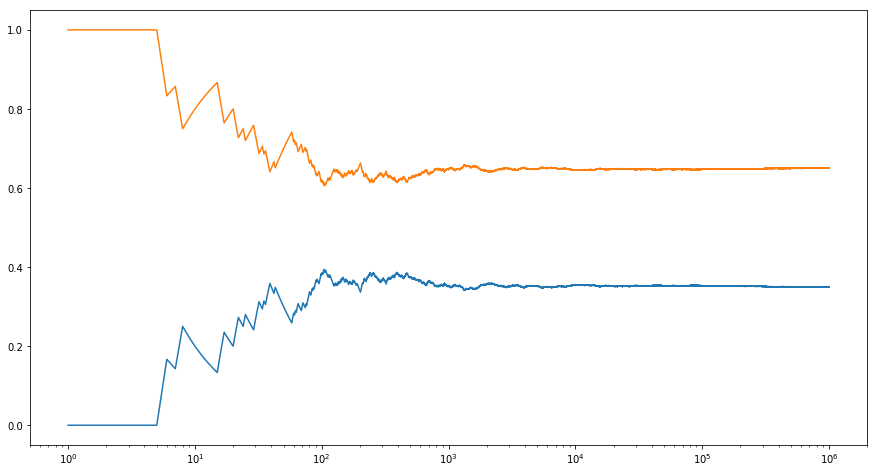

In [8]:
# number of samples
n = 1000000
y = np.random.uniform(0,1,n)
x = np.arange(1,n+1)
# count number of occurrences and divide by the number of total draws
p0 = np.cumsum(y < 0.35) / x
p1 = np.cumsum(y >= 0.35) / x

plt.figure(figsize=(15,8))
plt.semilogx(x,p0)
plt.semilogx(x,p1)
plt.show()

As we can see, on average this sampler will generate 35% zeros and 65% ones. Now what if we have more than two possible outcomes? We can simply generalize this idea as follows. Given any probability distribution, e.g. 
$p = [0.1, 0.2, 0.05, 0.3, 0.25, 0.1]$ we can compute its cumulative distribution (python's ``cumsum`` will do this for you) $F = [0.1, 0.3, 0.35, 0.65, 0.9, 1]$. Once we have this we draw a random variable $x$ from the uniform distribution $U[0,1]$ and then find the interval where $F[i-1] \leq x < F[i]$. We then return $i$ as the sample. By construction, the chances of hitting interval $[F[i-1], F[i])$ has probability $p(i)$. 

Note that there are many more efficient algorithms for sampling than the one above. For instance, binary search over $F$ will run in $O(\log n)$ time for $n$ random variables. There are even more clever algorithms, such as the [Alias Method](https://en.wikipedia.org/wiki/Alias_method) to sample in constant time, after $O(n)$ preprocessing.

### The normal distribution

The normal distribution (aka the Gaussian distribution) is given by $p(x) = \frac{1}{\sqrt{2 \pi}} \exp\left(-\frac{1}{2} x^2\right)$. Let's plot it to get a feel for it.

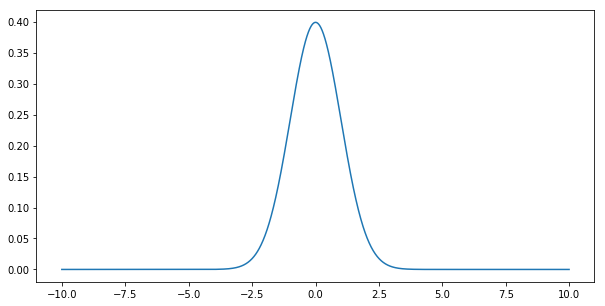

In [9]:
x = np.arange(-10,10,0.01)
p = (1/math.sqrt(2 * math.pi)) * np.exp(-0.5 * x**2)
plt.figure(figsize=(10,5))
plt.plot(x,p)
plt.show()

Sampling from this distribution is a lot less trivial. First off, the support is infinite, that is, for any $x$ the density $p(x)$ is positive. Secondly, the density is nonuniform. There are many tricks for sampling from it - the key idea in all algorithms is to stratify $p(x)$ in such a way as to map it to the uniform distribution $U[0,1]$. One way to do this is with the probability integral transform. 

Denote by $F(x) = \int_{-\infty}^x p(z) dz$ the cumulative distribution function (CDF) of $p$. This is in a way the continuous version of the cumulative sum that we used previously. In the same way we can now define the inverse map $F^{-1}(\xi)$, where $\xi$ is drawn uniformly. Unlike previously where we needed to find the correct interval for the vector $F$ (i.e. for the piecewise constant function), we now invert the function $F(x)$. 

In practice, this is slightly more tricky since inverting the CDF is hard in the case of a Gaussian. It turns out that the *twodimensional* integral is much easier to deal with, thus yielding two normal random variables than one, albeit at the price of two uniformly distributed ones. For now, suffice it to say that there are built-in algorithms to address this. 

The normal distribution has yet another desirable property. In a way all distributions converge to it, if we only average over a sufficiently large number of draws from any other distribution. To understand this in a bit more detail, we need to introduce three important things: expected values, means and variances. 

* The expected value $\mathbb{E}_{x \sim p(x)}[f(x)]$ of a function $f$ under a distribution $p$ is given by the integral $\int_x p(x) f(x) dx$. That is, we average over all possible outcomes, as given by $p$. 
* A particularly important expected value is that for the funtion $f(x) = x$, i.e. $\mu := \mathbb{E}_{x \sim p(x)}[x]$. It provides us with some idea about the typical values of $x$.
* Another important quantity is the variance, i.e. the typical deviation from the mean 
$\sigma^2 := \mathbb{E}_{x \sim p(x)}[(x-\mu)^2]$. Simple math shows (check it as an exercise) that
$\sigma^2 = \mathbb{E}_{x \sim p(x)}[x^2] - \mathbb{E}^2_{x \sim p(x)}[x]$.

The above allows us to change both mean and variance of random variables. Quite obviously for some random variable $x$ with mean $\mu$, the random variable $x + c$ has mean $\mu + c$. Moreover, $\gamma x$ has the variance $\gamma^2 \sigma^2$. Applying this to the normal distribution we see that one with mean $\mu$ and variance $\sigma^2$ has the form $p(x) = \frac{1}{\sqrt{2 \sigma^2 \pi}} \exp\left(-\frac{1}{2 \sigma^2} (x-\mu)^2\right)$. Note the scaling factor $\frac{1}{\sigma}$ - it arises from the fact that if we stretch the distribution by $\sigma$, we need to lower it by $\frac{1}{\sigma}$ to retain the same probability mass (i.e. the weight under the distribution always needs to integrate out to 1). 

### More distributions

Many more useful distributions exist. We recommend consulting a statistics book or looking some of them up on Wikipedia for further detail. 

* **Multinomial Distribution** It is used to describe the distribution over multiple draws from the same distribution, e.g. the number of heads when tossing a biased coin (i.e. a coin with probability $\pi$ of returning heads) 10 times. The probability is given by $p(x) = {n \choose x} \pi^x (1-\pi)^{n-x}$. 
* **Multivariate** Obviously we can have more than two outcomes, e.g. when rolling a dice multiple times. In this case the distribution is given by $p(x) = \frac{n!}{\prod_{i=1}^k x_i!} \prod_{i=1}^k \pi_i^{x_i}$.
* **Poisson Distribution** It is used to model the occurrence of point events that happen with a given rate, e.g. the number of raindrops arriving within a given amount of time in an area (weird fact - the number of Prussian soldiers being killed by horses kicking them followed that distribution). Given a rate $\lambda$, the number of occurrences is given by $p(x) = \frac{1}{x!} \lambda^x e^{-\lambda}$.
* **Beta, Dirichlet, Gamma, and Wishart Distributions** They are what statisticians call *conjugate* to the Binomial, Multinomial, Poisson and Gaussian respectively. Without going into detail, these distributions are often used as priors for coefficients of the latter set of distributions, e.g. a Beta distribution as a prior for modeling the probability for binomial outcomes.  

For whinges or inquiries, [open an issue on  GitHub.](https://github.com/zackchase/mxnet-the-straight-dope)